In [1]:
pip install python-louvain

In [3]:
pip install pyproj

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [56]:
from tabulate import tabulate

In [7]:
pip install basemap

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'C:\\Users\\87062\\ac\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [134]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import networkx as nx
import networkx.algorithms.community as nxcom
import networkx.algorithms.approximation as nxapp
from community import community_louvain
from collections import Counter

In [135]:
G = nx.read_graphml('data/network.xml')

In [136]:
layer_key  = {1: 'Lufthansa', 2: 'Ryanair', 3: 'Easyjet', 4: 'British_Airways', 5: 'Turkish_Airlines', 6: 'Air_Berlin', 7: 'Air_France', 8: 'Scandinavian_Airlines', 9: 'KLM', 10: 'Alitalia', 11: 'Swiss_International_Air_Lines', 12: 'Iberia', 13: 'Norwegian_Air_Shuttle', 14: 'Austrian_Airlines', 15: 'Flybe', 16: 'Wizz_Air', 17: 'TAP_Portugal', 18: 'Brussels_Airlines', 19: 'Finnair', 20: 'LOT_Polish_Airlines', 21: 'Vueling_Airlines', 22: 'Air_Nostrum', 23: 'Air_Lingus', 24: 'Germanwings', 25: 'Panagra_Airways', 26: 'Netjets', 27: 'Transavia_Holland', 28: 'Niki', 29: 'SunExpress', 30: 'Aegean_Airlines', 31: 'Czech_Airlines', 32: 'European_Air_Transport', 33: 'Malev_Hungarian_Airlines', 34: 'Air_Baltic', 35: 'Wideroe', 36: 'TNT_Airways', 37: 'Olympic_Air'}

In [137]:
layer = {}
for i in range(37):
  g = nx.Graph()
  edges = [(u, v) for u,v,e in G.edges(data=True) if e['layer'] == i+1]
  for e in edges:  
    u,v = e[0], e[1]
    if not (u in g.nodes()):
      g.add_node(u, name = G.nodes[u]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    if not (v in g.nodes()):
      g.add_node(v, name = G.nodes[v]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    g.add_edge(u, v)
  # Relabel
  d = {n:g.nodes[n]["name"] for n in g.nodes()}
  g = nx.relabel_nodes(g, d)
  al_name = layer_key[i+1]
  print(al_name);print(g);print()
  layer[al_name] = g

Lufthansa
Graph with 106 nodes and 244 edges

Ryanair
Graph with 128 nodes and 601 edges

Easyjet
Graph with 99 nodes and 307 edges

British_Airways
Graph with 65 nodes and 66 edges

Turkish_Airlines
Graph with 86 nodes and 118 edges

Air_Berlin
Graph with 75 nodes and 184 edges

Air_France
Graph with 59 nodes and 69 edges

Scandinavian_Airlines
Graph with 66 nodes and 110 edges

KLM
Graph with 63 nodes and 62 edges

Alitalia
Graph with 51 nodes and 93 edges

Swiss_International_Air_Lines
Graph with 48 nodes and 60 edges

Iberia
Graph with 35 nodes and 35 edges

Norwegian_Air_Shuttle
Graph with 52 nodes and 87 edges

Austrian_Airlines
Graph with 67 nodes and 72 edges

Flybe
Graph with 43 nodes and 99 edges

Wizz_Air
Graph with 45 nodes and 92 edges

TAP_Portugal
Graph with 42 nodes and 53 edges

Brussels_Airlines
Graph with 44 nodes and 43 edges

Finnair
Graph with 42 nodes and 42 edges

LOT_Polish_Airlines
Graph with 44 nodes and 55 edges

Vueling_Airlines
Graph with 36 nodes and 63 e

# Statistics of  airline alliance
Statistics table for 3 airline alliances, sort by edge

In [99]:
#sky team 7，9，10，31
sky=[]
SKY=[]
sky_list=[7,9,10,31]
col_names = ["Sky Team", "Node", "Edge"]
g = nx.Graph()
for i in sky_list:
  
  edges = [(u, v) for u,v,e in G.edges(data=True) if e['layer'] == i]
  for e in edges:  
    u,v = e[0], e[1]
    if not (u in g.nodes()):
      g.add_node(u, name = G.nodes[u]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    if not (v in g.nodes()):
      g.add_node(v, name = G.nodes[v]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    g.add_edge(u, v)
  # Relabel
  d = {n:g.nodes[n]["name"] for n in g.nodes()}
  g = nx.relabel_nodes(g, d)
  al_name = layer_key[i]
  SKY=g  
  node_edge = [al_name, g.number_of_nodes(), g.number_of_edges()]
  sky.append(node_edge)
sky = sorted(sky, key = lambda x: x[2], reverse = True)
print(tabulate(sky, headers=col_names, tablefmt="grid"))

+----------------+--------+--------+
| Sky Team       |   Node |   Edge |
+================+========+========+
| Czech_Airlines |    118 |    256 |
+----------------+--------+--------+
| Alitalia       |    105 |    217 |
+----------------+--------+--------+
| KLM            |     85 |    130 |
+----------------+--------+--------+
| Air_France     |     59 |     69 |
+----------------+--------+--------+


In [100]:
star=[]
STAR=[]
star_list=[1,8,11,14,17,18,20,30]
#star 1，8，11，14，17，18，20，30
col_names = ["Star Alliance", "Node", "Edge"]
g = nx.Graph()
for i in star_list:
  
  edges = [(u, v) for u,v,e in G.edges(data=True) if e['layer'] == i]
  for e in edges:  
    u,v = e[0], e[1]
    if not (u in g.nodes()):
      g.add_node(u, name = G.nodes[u]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    if not (v in g.nodes()):
      g.add_node(v, name = G.nodes[v]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    g.add_edge(u, v)
  # Relabel
  d = {n:g.nodes[n]["name"] for n in g.nodes()}
  g = nx.relabel_nodes(g, d)
  al_name = layer_key[i]
  STAR = g
  node_edge = [al_name, g.number_of_nodes(), g.number_of_edges()]
  star.append(node_edge)
star = sorted(star, key = lambda x: x[2], reverse = True)
print(tabulate(star,headers=col_names, tablefmt="grid"))

+-------------------------------+--------+--------+
| Star Alliance                 |   Node |   Edge |
+===============================+========+========+
| Aegean_Airlines               |    180 |    640 |
+-------------------------------+--------+--------+
| LOT_Polish_Airlines           |    166 |    591 |
+-------------------------------+--------+--------+
| Brussels_Airlines             |    161 |    551 |
+-------------------------------+--------+--------+
| TAP_Portugal                  |    158 |    513 |
+-------------------------------+--------+--------+
| Austrian_Airlines             |    150 |    464 |
+-------------------------------+--------+--------+
| Swiss_International_Air_Lines |    137 |    397 |
+-------------------------------+--------+--------+
| Scandinavian_Airlines         |    134 |    345 |
+-------------------------------+--------+--------+
| Lufthansa                     |    106 |    244 |
+-------------------------------+--------+--------+


In [101]:
oneworld=[]
ONEWORLD=[]
oneworld_list=[4,6,19,23]
#oneworld 4，6，19，23
col_names = ["One World", "Node", "Edge"]
g = nx.Graph()
for i in oneworld_list:
  
  edges = [(u, v) for u,v,e in G.edges(data=True) if e['layer'] == i]
  for e in edges:  
    u,v = e[0], e[1]
    if not (u in g.nodes()):
      g.add_node(u, name = G.nodes[u]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    if not (v in g.nodes()):
      g.add_node(v, name = G.nodes[v]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    g.add_edge(u, v)
  # Relabel
  d = {n:g.nodes[n]["name"] for n in g.nodes()}
  g = nx.relabel_nodes(g, d)
  al_name = layer_key[i]
  ONEWORLD = g
  node_edge = [al_name, g.number_of_nodes(), g.number_of_edges()]
  oneworld.append(node_edge)
oneworld = sorted(oneworld, key = lambda x: x[2], reverse = True)
print(tabulate(oneworld,headers=col_names, tablefmt="grid"))

+-----------------+--------+--------+
| One World       |   Node |   Edge |
+=================+========+========+
| Air_Lingus      |    131 |    345 |
+-----------------+--------+--------+
| Finnair         |    123 |    289 |
+-----------------+--------+--------+
| Air_Berlin      |    107 |    250 |
+-----------------+--------+--------+
| British_Airways |     65 |     66 |
+-----------------+--------+--------+


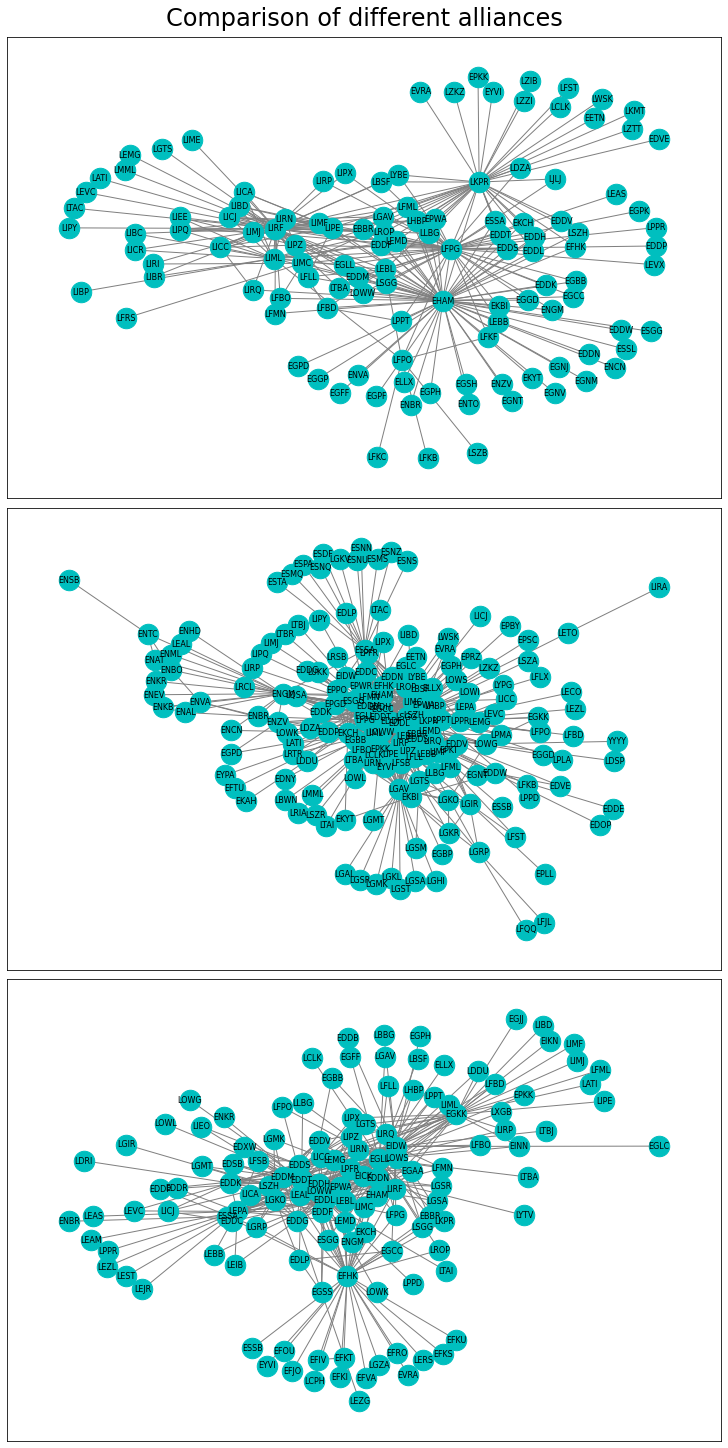

In [112]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (10,20),constrained_layout=True)


nx.draw_networkx(SKY, with_labels = True, pos = nx.spring_layout(SKY),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax1)

nx.draw_networkx(STAR, with_labels = True, pos = nx.spring_layout(STAR),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax2)

nx.draw_networkx(ONEWORLD, with_labels = True, pos = nx.spring_layout(ONEWORLD),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax3)


plt.suptitle('Comparison of different alliances', fontsize=24)
plt.savefig('Alliance.pdf')
plt.show()

# Draw geographic distribution of different alliances

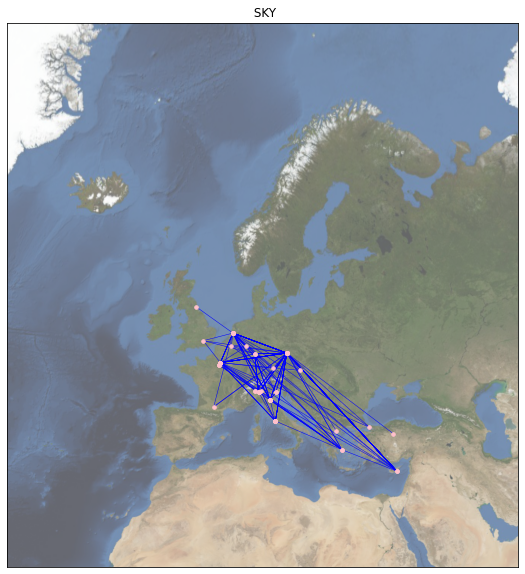

In [113]:
  g = SKY
  plt.figure(figsize=(10, 10))
  map = Basemap(projection='merc', resolution='c',
                llcrnrlat=20, urcrnrlat=75,
                llcrnrlon=-35, urcrnrlon=55,)
  pos = {}
  for n in g.nodes():
      x,y = map(g.nodes[n]['nodeLong'], g.nodes[n]['nodeLat'])
      pos[n] = (x,y)

  # draw map
  map.bluemarble(alpha=0.6)
  # map.shadedrelief()
  nx.draw_networkx(g, pos=pos, node_size=50, edge_color='b', node_color='pink',
                  arrows=False, with_labels=False, alpha=1, width=0.5, node_shape='.')
  plt.title( ' SKY')
  plt.savefig(f'geo_SKY.pdf')
  plt.show()

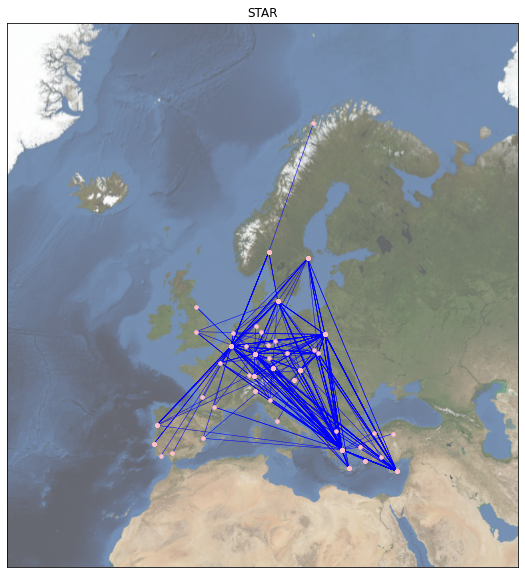

In [110]:
  g = STAR
  plt.figure(figsize=(10, 10))
  map = Basemap(projection='merc', resolution='c',
                llcrnrlat=20, urcrnrlat=75,
                llcrnrlon=-35, urcrnrlon=55,)
  pos = {}
  for n in g.nodes():
      x,y = map(g.nodes[n]['nodeLong'], g.nodes[n]['nodeLat'])
      pos[n] = (x,y)

  # draw map
  map.bluemarble(alpha=0.6)
  # map.shadedrelief()
  nx.draw_networkx(g, pos=pos, node_size=50, edge_color='b', node_color='pink',
                  arrows=False, with_labels=False, alpha=1, width=0.5, node_shape='.')
  plt.title('STAR')
  plt.savefig(f'geo_STAR.pdf')
  plt.show()

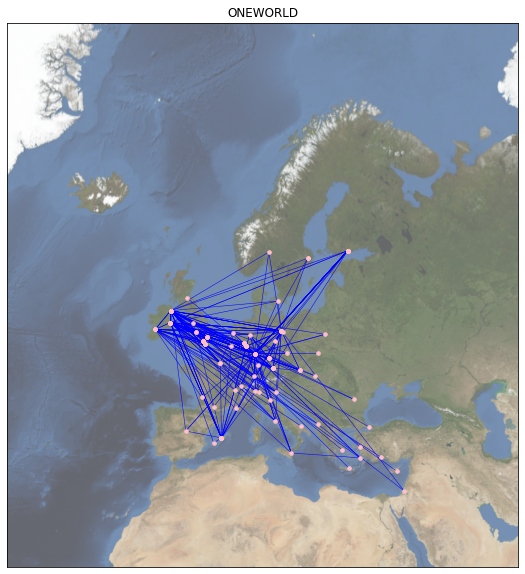

In [111]:
  g = ONEWORLD
  plt.figure(figsize=(10, 10))
  map = Basemap(projection='merc', resolution='c',
                llcrnrlat=20, urcrnrlat=75,
                llcrnrlon=-35, urcrnrlon=55,)
  pos = {}
  for n in g.nodes():
      x,y = map(g.nodes[n]['nodeLong'], g.nodes[n]['nodeLat'])
      pos[n] = (x,y)

  # draw map
  map.bluemarble(alpha=0.6)
  # map.shadedrelief()
  nx.draw_networkx(g, pos=pos, node_size=50, edge_color='b', node_color='pink',
                  arrows=False, with_labels=False, alpha=1, width=0.5, node_shape='.')
  plt.title( 'ONEWORLD')
  plt.savefig(f'geo_ONEWORLD.pdf')
  plt.show()

# Community Detection between airline and alliance(Greedy Modularity Algorithm)

In [175]:
# compute random vertex color used for commmunity visualisation
memory = {}
def random_color(number, memory):
    if not number in memory:
        r = random.random()
        g = random.random()
        b = random.random()
        memory[number] = (r, g, b, 1.0)
    return memory[number]

# draw community graphs
def draw_community_graph(g, communities, with_labels=True):
    plt.figure(figsize=(8,8))
    # add community attribute
    for set_idx, frozenset in enumerate(communities):
        for node_idx in frozenset:
            g.nodes[node_idx]['community'] = set_idx
    # color mapping
    color_map = [random_color(g.nodes[v]['community'], memory) for v in g.nodes]
    nx.draw(g, with_labels=with_labels, node_color=color_map)
    plt.show()

In [198]:
G = SKY
# compute communities
communities_greedy = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
#draw_community_graph(G, communities_greedy, with_labels=False)
print(f'Fast greedy algorithm resulted in {len(communities_greedy)} communities')

Fast greedy algorithm resulted in 6 communities


In [199]:
for i,c in enumerate(communities_greedy):
    print(f'{i}: {len(c)}')

0: 33
1: 28
2: 26
3: 22
4: 5
5: 4


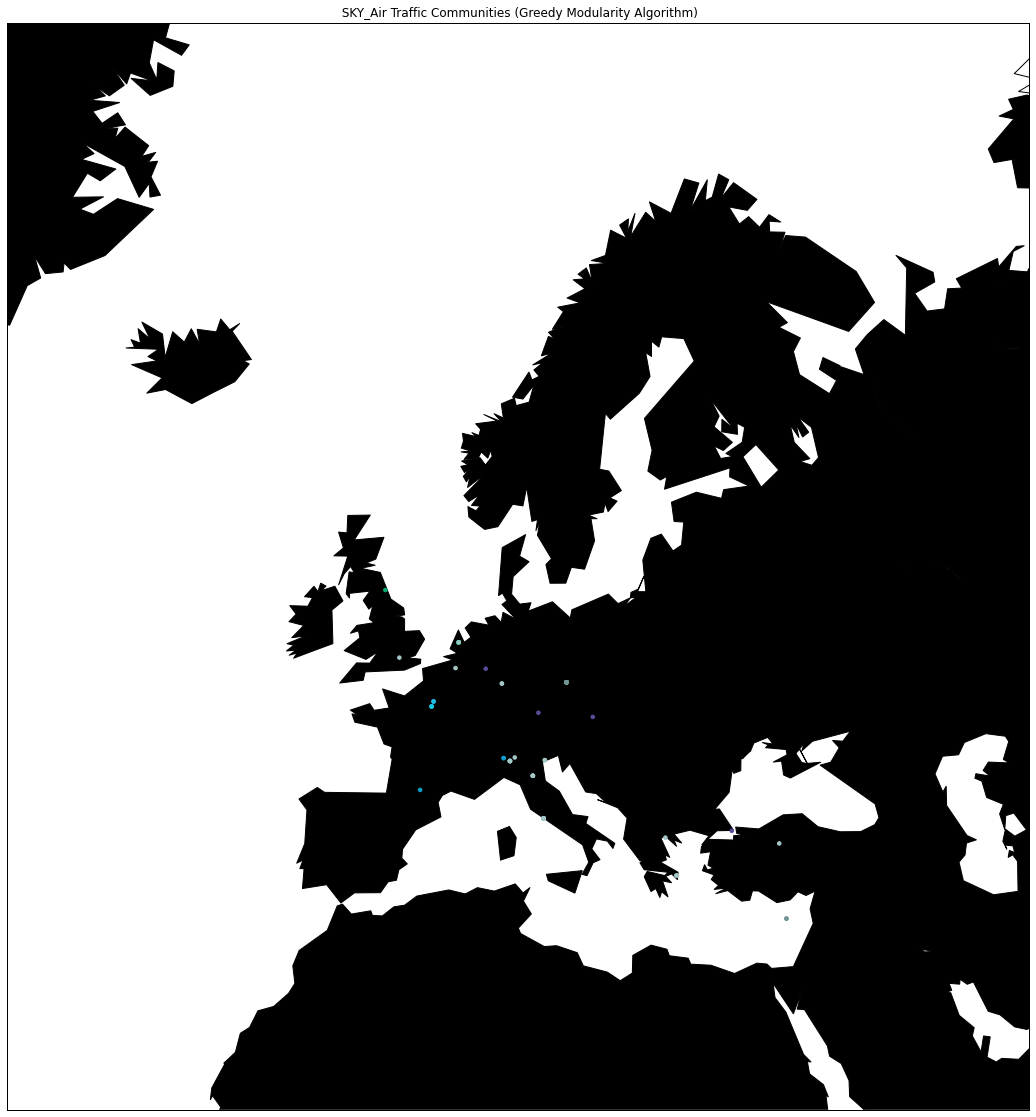

In [200]:
plt.figure(figsize=(20, 20))
map = Basemap(projection='merc', resolution='c',
              llcrnrlat=20, urcrnrlat=75,
              llcrnrlon=-35, urcrnrlon=55,)

pos = {}
for n in G.nodes():
    x,y = map(G.nodes[n]['nodeLong'], G.nodes[n]['nodeLat'])
    pos[n] = (x,y)

# add community attribute
for set_idx, frozenset in enumerate(communities_greedy):
    for node_idx in frozenset:
        G.nodes[node_idx]['community'] = set_idx
# color mapping
color_map = [random_color(G.nodes[v]['community'], memory) for v in G.nodes]
# draw map
map.drawcoastlines()
map.fillcontinents(color='black',lake_color='white')
map.drawmapboundary(fill_color='white')
# map.drawparallels(np.arange(-90.,91.,30.))
# map.drawmeridians(np.arange(-180.,181.,60.))
# map.shadedrelief()
nx.draw_networkx(G, pos=pos, node_size=50, edge_color='r', node_color=color_map,
                 arrows=False, with_labels=False, alpha=1, width=00, node_shape='.')
plt.title(' SKY_Air Traffic Communities (Greedy Modularity Algorithm)')
plt.savefig('geo_SKY_gma.pdf')
plt.show()

In [206]:
def draw_gma(al_names):
    G=layer[al_names]
    communities_greedy = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
     #draw_community_graph(G, communities_greedy, with_labels=False)
    print(f'Fast greedy algorithm resulted in {len(communities_greedy)} communities')
    for i,c in enumerate(communities_greedy):
         print(f'{i}: {len(c)}')
    
    plt.figure(figsize=(8, 8))
    map = Basemap(projection='merc', resolution='c',
              llcrnrlat=20, urcrnrlat=75,
              llcrnrlon=-35, urcrnrlon=55,)

    pos = {}
    for n in G.nodes():
        x,y = map(G.nodes[n]['nodeLong'], G.nodes[n]['nodeLat'])
        pos[n] = (x,y)

# add community attribute
    for set_idx, frozenset in enumerate(communities_greedy):
        for node_idx in frozenset:
            G.nodes[node_idx]['community'] = set_idx
# color mapping
    color_map = [random_color(G.nodes[v]['community'], memory) for v in G.nodes]
# draw map
    map.drawcoastlines()
    map.fillcontinents(color='black',lake_color='white')
    map.drawmapboundary(fill_color='white')
# map.drawparallels(np.arange(-90.,91.,30.))
# map.drawmeridians(np.arange(-180.,181.,60.))
# map.shadedrelief()
    nx.draw_networkx(G, pos=pos, node_size=50, edge_color='r', node_color=color_map,
                 arrows=False, with_labels=False, alpha=1, width=00, node_shape='.')
    plt.title(f' {al_names}_ Traffic Communities (Greedy Modularity Algorithm)')
    plt.savefig(f'geo_{al_names}_gma.pdf')
    plt.show()

Fast greedy algorithm resulted in 1 communities
0: 63


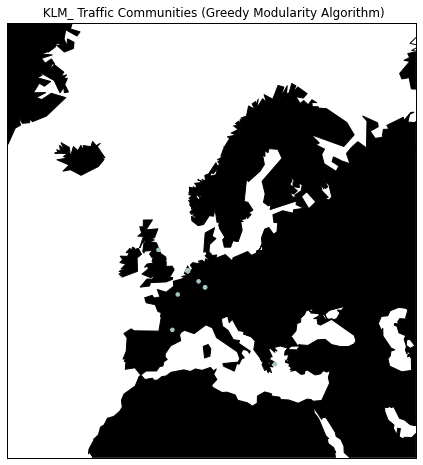

In [207]:
draw_gma('KLM')

Fast greedy algorithm resulted in 1 communities
0: 42


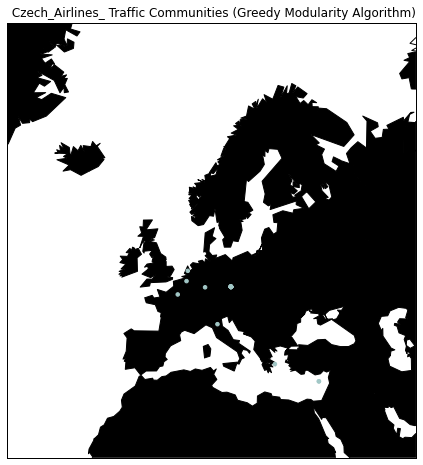

In [208]:
draw_gma('Czech_Airlines')

Fast greedy algorithm resulted in 4 communities
0: 24
1: 14
2: 11
3: 2


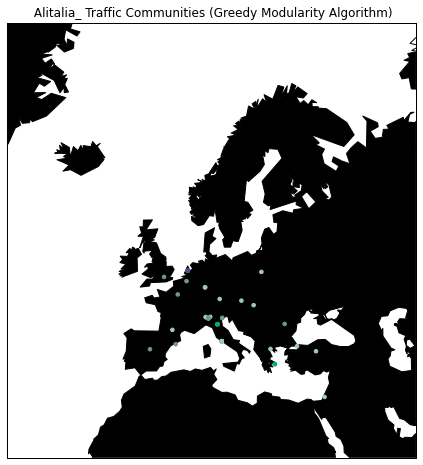

In [209]:
draw_gma('Alitalia')

Fast greedy algorithm resulted in 3 communities
0: 41
1: 10
2: 8


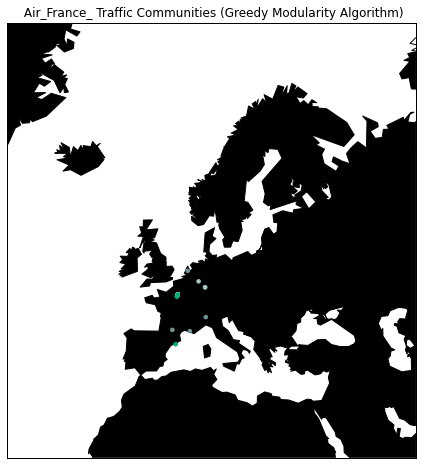

In [210]:
draw_gma('Air_France')